In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#reset the default plot asthetics to be prettier
sns.set_style('white')

In [15]:
df = pd.read_csv('C:/Users/yakan/OneDrive/Documents/Thinkful/DS_Bootcamp/U2/capstone/income-tax-components-by-size-of-income-by-place-of-residence-beginning-tax-year-1999.csv')

### Preliminary look at the data and some modifications.

In [16]:
df.head()

,Tax Year,Resident Type,Place of Residence,Country,State,County,Income Class,Disclosure,Number of All Returns,NY AGI of All Returns (in thousands) *,Deductions of All Returns (in thousands),Dependent Exemptions of All Returns (in thousands),Taxable Income of All Returns (in thousands),Tax Before Credits of All Returns (in thousands),Tax Liability of All Returns (in thousands) **,Place of Residence Sort Order,Income Class Sort Order
0,2014,Full-Year Resident,New York City - Bronx,United States,New York,New York City - Bronx,"Under 5,000",NaN,115872.0,28535.362,121985.033,1.000,3335.610,133.528,-7226.155,1,1
1,2014,Full-Year Resident,New York City - Bronx,United States,New York,New York City - Bronx,"5,000 - 9,999",NaN,64472.0,497520.476,453287.232,3907.523,40325.721,1613.677,-24640.639,1,2
2,2014,Full-Year Resident,New York City - Bronx,United States,New York,New York City - Bronx,"10,000 - 19,999",NaN,125775.0,1848243.085,1222947.457,87664.662,537630.966,21717.698,-83445.904,1,3
3,2014,Full-Year Resident,New York City - Bronx,United States,New York,New York City - Bronx,"20,000 - 29,999",NaN,82181.0,2028682.259,867453.711,73712.451,1087516.097,47154.276,-11812.793,1,4
4,2014,Full-Year Resident,New York City - Bronx,United States,New York,New York City - Bronx,"30,000 - 39,999",NaN,64824.0,2259143.529,713694.013,58814.362,1486635.154,70580.685,38910.764,1,5


#### Print out the full list of columns in the data frame to begin identifying categorical and continuous variables.

In [17]:
list(df.columns)

['Tax Year',
 'Resident Type',
 'Place of Residence',
 'Country',
 'State',
 'County',
 'Income Class',
 'Disclosure',
 'Number of All Returns',
 'NY AGI of All Returns (in thousands) *',
 'Deductions of All Returns (in thousands)',
 'Dependent Exemptions of All Returns (in thousands)',
 'Taxable Income of All Returns (in thousands)',
 'Tax Before Credits of All Returns (in thousands)',
 'Tax Liability of All Returns (in thousands) **',
 'Place of Residence Sort Order',
 'Income Class Sort Order']

In [18]:
#rename the columns into easier names
#df.rename(columns={"A": "a", "B": "c"})
df = df.rename(columns = {
    "Tax Year": "tax_yr",
    "Resident Type": "resident_type",
    "Place of Residence": "residence_pl",
    "Country": "cntry",
    "State": "state",
    "Income Class": "income_class",
    "Disclosure": "disclosure",
    "Number of All Returns": "all_returns_num",
    "NY AGI of All Returns (in thousands) *": "agi",
    "Deductions of All Returns (in thousands)": "deductions",
    "Dependent Exemptions of All Returns (in thousands)": "depend_exempt",
    "Taxable Income of All Returns (in thousands)": "tax_income",
    "Tax Before Credits of All Returns (in thousands)": "tax_prior_credits",
    "Tax Liability of All Returns (in thousands) **": "tax_liabil",
    "Place of Residence Sort Order": "pl_of_res_sort_order",
    "Income Class Sort Order": "inc_class_sort_order"
})

In [58]:
df.describe()

,tax_yr,all_returns_num,agi,deductions,depend_exempt,tax_income,tax_prior_credits,tax_liabil,pl_of_res_sort_order,inc_class_sort_order
count,23735.000000,2.343900e+04,2.343900e+04,2.343900e+04,2.343900e+04,2.343900e+04,2.343900e+04,2.343900e+04,23735.000000,23735.000000
mean,2007.220645,2.531241e+04,2.137719e+06,3.229005e+05,1.411666e+04,1.752082e+06,1.204284e+05,8.154471e+04,81.604803,7.073773
std,4.632102,2.385621e+05,1.834359e+07,2.876288e+06,1.312834e+05,1.533540e+07,1.079722e+06,8.377998e+05,62.110581,3.827778
min,1999.000000,0.000000e+00,-1.370167e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.674791e+05,1.000000,1.000000
25%,2003.000000,2.210000e+02,1.088650e+04,2.882000e+03,4.400000e+01,4.779388e+03,2.360000e+02,3.646000e+01,30.000000,4.000000
50%,2008.000000,1.618000e+03,7.498000e+04,1.913200e+04,5.960000e+02,4.828600e+04,2.573000e+03,1.364905e+03,59.000000,7.000000
75%,2011.000000,5.996000e+03,3.659255e+05,7.283900e+04,2.907000e+03,2.588935e+05,1.526408e+04,8.602500e+03,128.000000,10.000000
max,2014.000000,9.082186e+06,6.736595e+08,1.092628e+08,4.720151e+06,5.755124e+08,3.912255e+07,3.501178e+07,250.000000,14.000000


It seems like the following columns are continuous variables:

- tax_yr
- all_returns_num
- agi
- deductions
- depend_exempt
- tax_income
- tax_prior_credits
- tax_liabil
- pl_of_res_sort_order
- inc_class_sort_order

It seems like the following columns are categorical variables:

- resident_type
- residence_pl
- cntry
- state
- income_class
- disclosure

### Narrow down the data set to an outcome variable and additional five variables to work with.
#### (These will act as the basis for feature engineering and will be explored with univariate and bivariate analysis methods.)

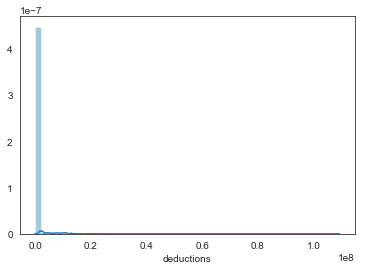

In [19]:
#let's take a look at the distribution of deductions of all returns
#(which is reported in thousands in this data set)
deduct = df['deductions']
deduct_no_na = deduct[~np.isnan(deduct)] 

#sns.distplot(df['deductions'].astype(np.float32).notnull(), hist = True)
#plt.show()

sns.distplot(deduct_no_na, hist = True)
plt.show()

It seems like the amount of deductions from the returns has a very long right tail, which implies that there are a large number of outliers. Deductions will be the outcome variable of interest in this data set, because it is likely influenced by a number of other factors, such as total taxable income, number of dependent exemptions, state, and income class. 

Taxable income of all returns (tax_income), dependent exemptions of all returns (depend_exempt), state, and income class (income_class) will act as the other variables of interest from this data set.

#### Exploring data with univariate and bivariate methods.

##### Explore the continuous variables

Text(0.5, 1.0, 'Dependent Exemptions')

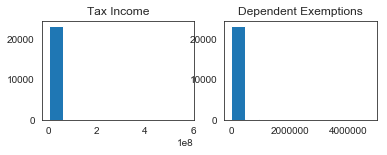

In [20]:
#plot tax_income and depend_exempt to check for notmality
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df['tax_income'].dropna())
plt.title('Tax Income')

fig.add_subplot(222)
plt.hist(df['depend_exempt'].dropna())
plt.title('Dependent Exemptions')

The histograms of the continuous variables are not very useful - they just show that there are a very large number of observations that are in a very narrow range of values. So, perhaps boxplots of these could shine some more light.

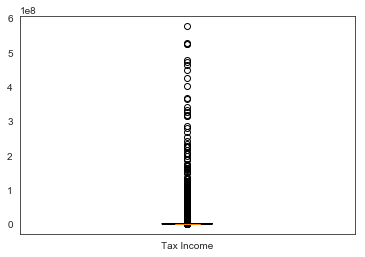

In [21]:
plt.boxplot((df['tax_income'].dropna()), notch=True, sym="o", 
            labels=["Tax Income"])
plt.show()

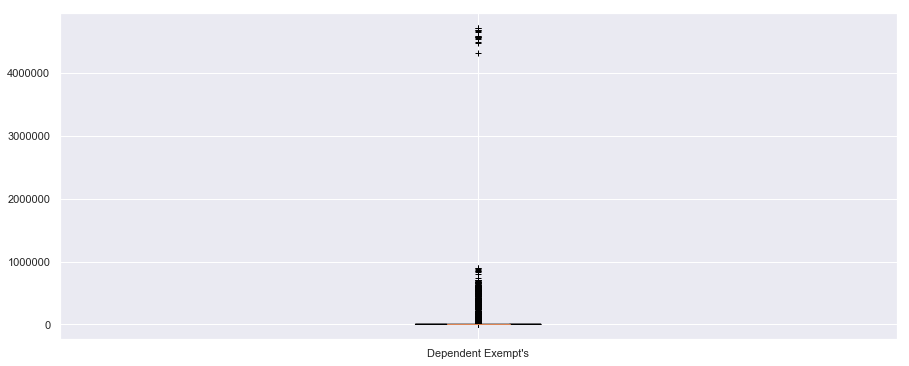

In [62]:
plt.boxplot((df['depend_exempt'].dropna()), notch = True, sym = '+',
            labels = ["Dependent Exempt's"])
plt.show()

The taxable income seems to have a large number of outliers, with the bulk clustering around the lower values. However, the dependent exemptions (in thousands) seems to have a smaller, tighter group of outliers with values above 4 million. The rest of the points are all under one million. This is a good candidate for feature development.

Let's take a look at the relationship between taxable income and dependent exemtion values.

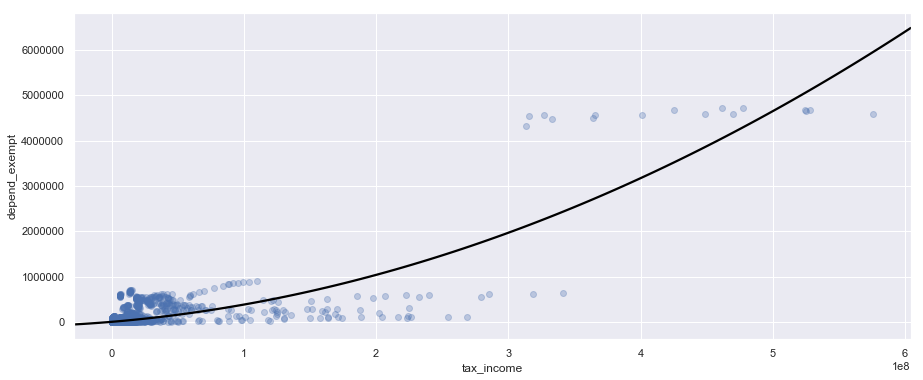

In [63]:
sns.regplot(
    df['tax_income'],
    y = df['depend_exempt'],
    y_jitter = .49,
    order = 2, 
    scatter_kws = {'alpha': 0.3},
    line_kws = {'color': 'black'},
    ci = None
)
plt.show()

These two variables are not highly correlated, since there is no visible trend around the fitted line of the plot. There is some suggestion of a non-linear relationship. However, the most tricking observation is the outlying group of values, which is what the box plot of the dependents' exemptions variable showed. This further confirms that it is a really good candidate for feature engineering.

It is also worthwhile to look at the correlation between taxable income, tax credit amount, agi, and tax liability amount, since there is a possibility that they may be correlated.

In [64]:
df_subset = df.loc[:, ['tax_income', 'tax_prior_credits', 'tax_liabil', 'agi']]
corr_matrix = df_subset.corr()
print(corr_matrix)

                   tax_income  tax_prior_credits  tax_liabil       agi
tax_income           1.000000           0.994419    0.936408  0.997698
tax_prior_credits    0.994419           1.000000    0.919566  0.989005
tax_liabil           0.936408           0.919566    1.000000  0.925477
agi                  0.997698           0.989005    0.925477  1.000000


It seems like these four variables are really highly correlated. This makes sense, because the adjusted gross income (agi) is computed from the total taxable income reported, minus the tax credits and plus additional liabilities. Since these variables are essentially computed from each other and are highly correlated, it does not make sense to keep all of them in a model. 

I think it would be interesting to retain one variable, such as AGI, for the model and use the other ones to come up with some additional features.

##### Explore the categorical variables

In [66]:
#check how many states are included in this data set
df.state.unique()

array(['New York', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'All', 'Not Applicable',
       'All - Excluding New York', 'All Other States'], dtype=object)

There are a number of different states represented in the data set; it would be worthwhile to break this up into 'New York', 'Other States', and 'NA' groups and perhaps exclude observations under 'All' or 'All - Excluding New York', since it's not clear which states these indicate. It would also be worthwhile to separate them by region of the country, such as Northeast, Southeast, 'Central', 'Northwest', and 'Southwest' to see if the area has an impact on deductions.

#### Designing 10 new features.

##### Feature #1

In [22]:
features = pd.DataFrame()

In [23]:
features['dependent_hi_lo'] = np.where(df['depend_exempt'] >= 4000000, 1, 0)
#print(features['dependent_cat'].describe())
#print(features.groupby('dependent_cat').count())
#features.groupby('dependent_cat').agg('sum')
print(features['dependent_hi_lo'].value_counts())

0    23719
1       16
Name: dependent_hi_lo, dtype: int64


The first feature makes it possible to evlauate the effect of individuals reporting very high values of dependents' exemptions (above four million dollars) vs. everyone else. There are 16 tax returns reporting that value, so it actually makes sense to set up another feature from this variable that breaks the values down into more categories.

##### Feature #2

In [24]:
bin = [0, 5000, 10000, 100000, 250000, 500000, 1000000, 4000000, 5000000]
features['dependent_cat'] = pd.cut(df.depend_exempt, bin)

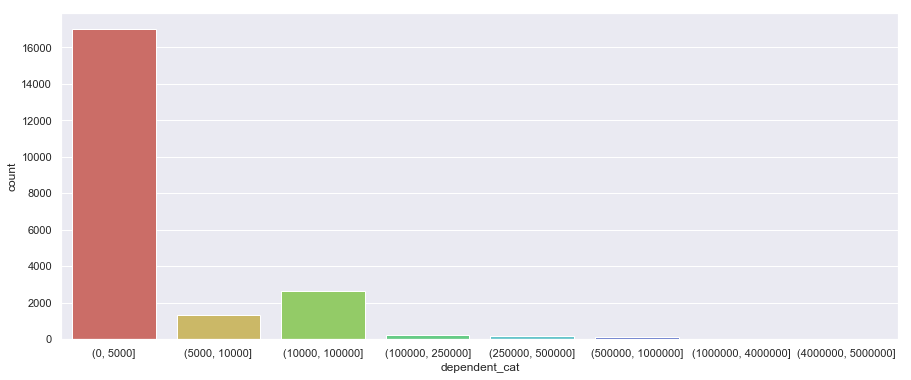

In [25]:
sns.set(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':(15, 6)})

#draw histogram plot to see how many values fall into each category
sns.countplot(x = 'dependent_cat', data = features, palette = 'hls')
plt.show()

Breaking the variable down into a wider range of categories makes for a better feature, because it would help to ascertain how different ranges of the dependent exemption amounts may impact the total deductions.

##### Feature #3

Since these are returns filed in New York, it would be useful to have a binary variable that describes if the return if filed in New York or not, so this is a potentially useful additional feature.

In [26]:
features['ny_yes_no'] = np.where((df['state'].isin(['New York'])), 1, 0)

##### Feature #4

Furthermore, there could be a relationship between the area of the country and the amount taken in deductions, so it would also be worthwhile to map the state variable to an area of the country as a new feature.

In [27]:
features['area'] = ''
features.loc[(df['state'].isin(['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'New York', 'New Jersey',
                         'Pennsylvania', 'Rhode Island', 'Vermont', 'Maryland',
                               'Delaware', 'District of Columbia'])), 'area'] = 'NE'
features.loc[df['state'].isin(['Alabama', 'Georgia', 'Florida', 'Kentucky', 'Mississippi',
                              'North Carolina', 'South Carolina', 'Louisiana', 'Tennessee',
                              'Virginia']), 'area'] = 'SE'
features.loc[df['state'].isin(['North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Oklahoma', 'Texas',
                               'Minnesota', 'Iowa', 'Missouri', 'Arkansas', 'Wisconsin', 'Illinois',
                               'Indiana', 'Ohio', 'West Virginia']), 'area'] = 'Central' #35
features.loc[df['state'].isin(['Alaska', 'Arizona', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana',
                               'Nevada', 'New Mexico', 'Oregon', 'Utah', 'Washington', 
                               'Wyoming']), 'area'] = 'West'
features.loc[df['state'].isin(['All', 'All - Excluding New York', 'All Other States']), 'area'] = 'Other'
features.loc[df['state'].isin(['Not Applicable']), 'area'] = 'NA'

In [28]:
features['area'].value_counts()

NE         15791
Central     1948
NA          1902
SE          1664
West        1598
Other        624
             208
Name: area, dtype: int64

##### Feature #5

In [29]:
features['inc_liab_ratio'] = df['tax_income'] / df['tax_liabil']

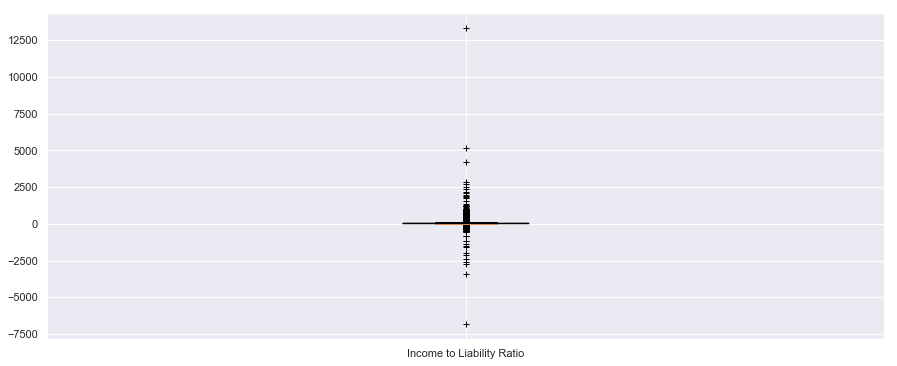

In [75]:
plt.boxplot((features['inc_liab_ratio'].dropna()), notch = True, sym = '+',
            labels = ["Income to Liability Ratio"])
plt.show()

The ratio of tax liability to reported income is a very interesting feature. The majority of the data points cluster around one (or a very small interval around one), which suggests that most individuals liability is equal to their income. There are also individuals with higher incomes than tax liability and some individuals whose income to liability ratio is negative.

It might be interesting to break this down further into folks with positive ratio and those with negative ratio.

In [31]:
#check to see how the ratio correlates to the variables that generated it and the outcome of interest



############ask about this####### why is there the NaN? What happened in the data set merge?
df_subset = df.loc[:, ['tax_income', 'tax_liabil', 'deductions']]
df_subset['inc_liab_ratio'] = features['inc_liab_ratio']

#frames = [df_subset, features_subset]
#concat_df = pd.concat(frames, sort = False)

corr_matrix = df_subset.corr()
print(corr_matrix)

                tax_income  tax_liabil  deductions  inc_liab_ratio
tax_income        1.000000    0.936408    0.871269        0.000910
tax_liabil        0.936408    1.000000    0.870278       -0.010916
deductions        0.871269    0.870278    1.000000       -0.010550
inc_liab_ratio    0.000910   -0.010916   -0.010550        1.000000


##### Feature #6

In [77]:
features['liab_to_credits'] = df['tax_liabil'] / df['tax_prior_credits']

C:\Users\yaaaxv\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:75: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


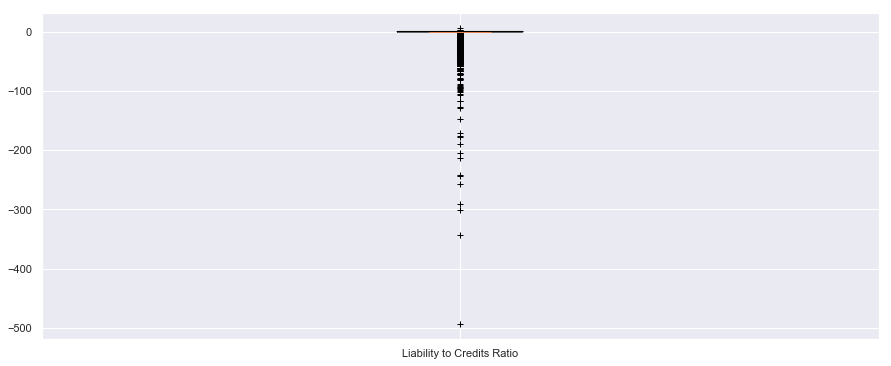

In [78]:
plt.boxplot((features['liab_to_credits'].dropna()), notch = True, sym = '+',
            labels = ["Liability to Credits Ratio"])
plt.show()

In [79]:
features_ = pd.get_dummies(features)
features_.head()

,dependent_hi_lo,ny_yes_no,inc_liab_ratio,liab_to_credits,"dependent_cat_(0, 5000]","dependent_cat_(5000, 10000]","dependent_cat_(10000, 100000]","dependent_cat_(100000, 250000]","dependent_cat_(250000, 500000]","dependent_cat_(500000, 1000000]","dependent_cat_(1000000, 4000000]","dependent_cat_(4000000, 5000000]",area_,area_Central,area_NA,area_NE,area_Other,area_SE,area_West
0,0,1,-0.461602,-54.117151,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,1,-1.636553,-15.269871,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,1,-6.442868,-3.842300,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0,1,-92.062571,-0.250514,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,38.206270,0.551295,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [35]:
#missing data in columns
#all same values in columns

features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23735 entries, 0 to 23734
Data columns (total 5 columns):
dependent_hi_lo    23735 non-null int32
dependent_cat      21542 non-null category
ny_yes_no          23735 non-null int32
area               23735 non-null object
inc_liab_ratio     23393 non-null float64
dtypes: category(1), float64(1), int32(2), object(1)
memory usage: 486.9+ KB


##### It seems like there is very little missing data in the features columns, so I would elect to keep these five features.